
آنالیز میلیاردر های جهان به زبان پایتون

In [46]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('inputs\Billionaire.csv')

data.head(-10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2740,Wang Qiangxiang,$1 B,China,artificial turf,2674,49.0,Service
2741,Wang Wenjian,$1 B,China,optical devices,2674,74.0,Technology
2742,J. Wayne Weaver,$1 B,United States,Shoes,2674,85.0,Diversified
2743,Sandy Weill,$1 B,United States,Citigroup,2674,88.0,Finance & Investments


Preprocessing


In [48]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [49]:
data = data.dropna()

In [50]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [51]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)

In [52]:
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


Pprocessing

In [53]:
df = data.sort_values(by= 'NetWorth', ascending=False).head(10).reset_index(drop=True)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


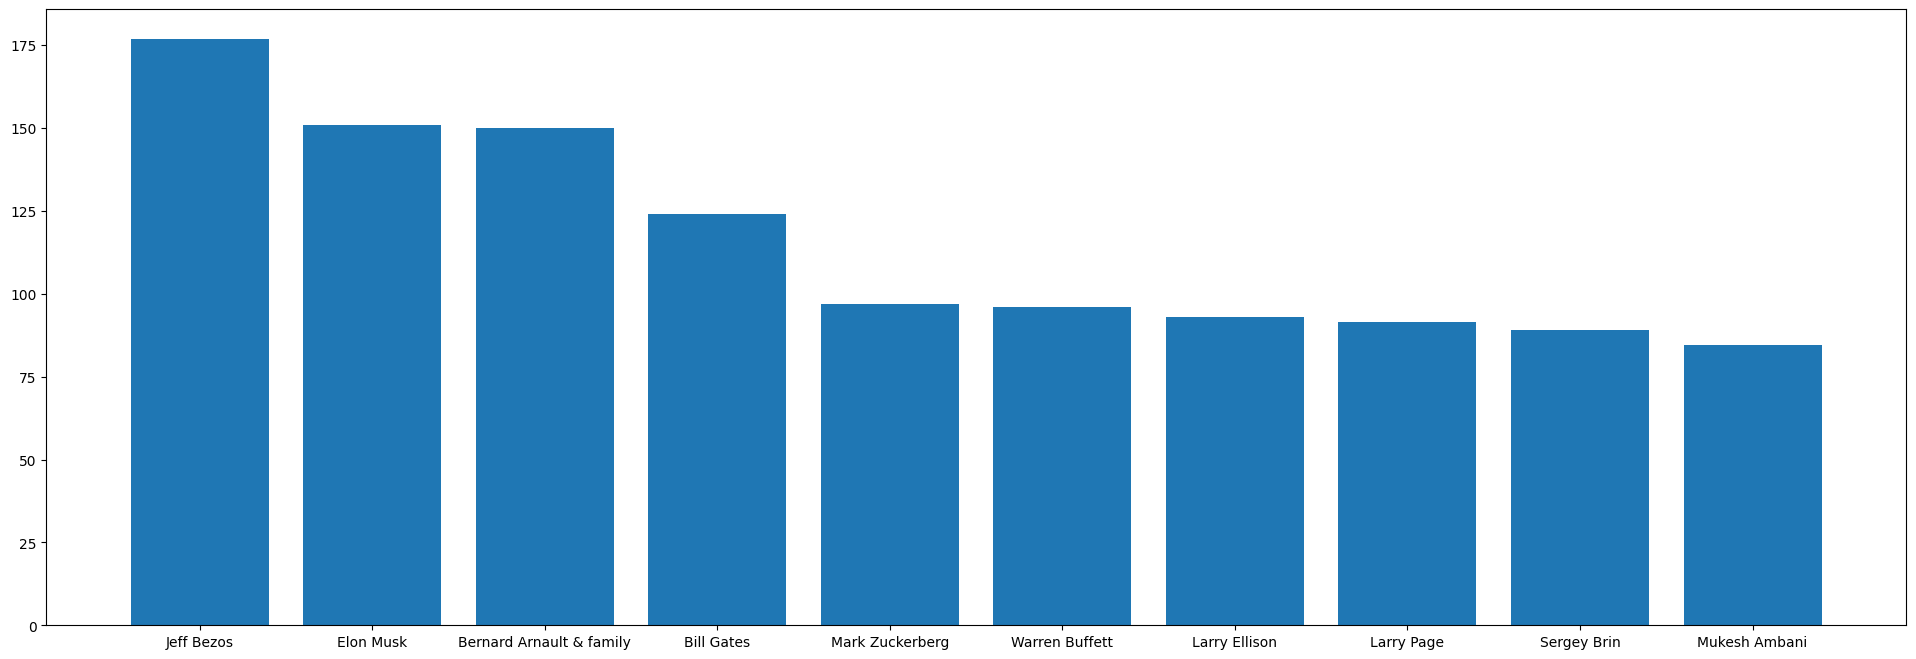

In [54]:
plt.figure(figsize=(24, 8))
plt.bar(df['Name'], df['NetWorth'])
plt.show()

In [55]:
df = data['Source'].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


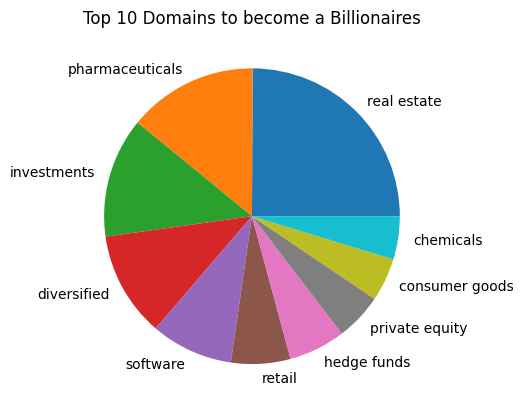

In [56]:
plt.pie(df['count'], labels=df['Source'])
plt.title('Top 10 Domains to become a Billionaires')
plt.show()

In [57]:
df = data['Industry'].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


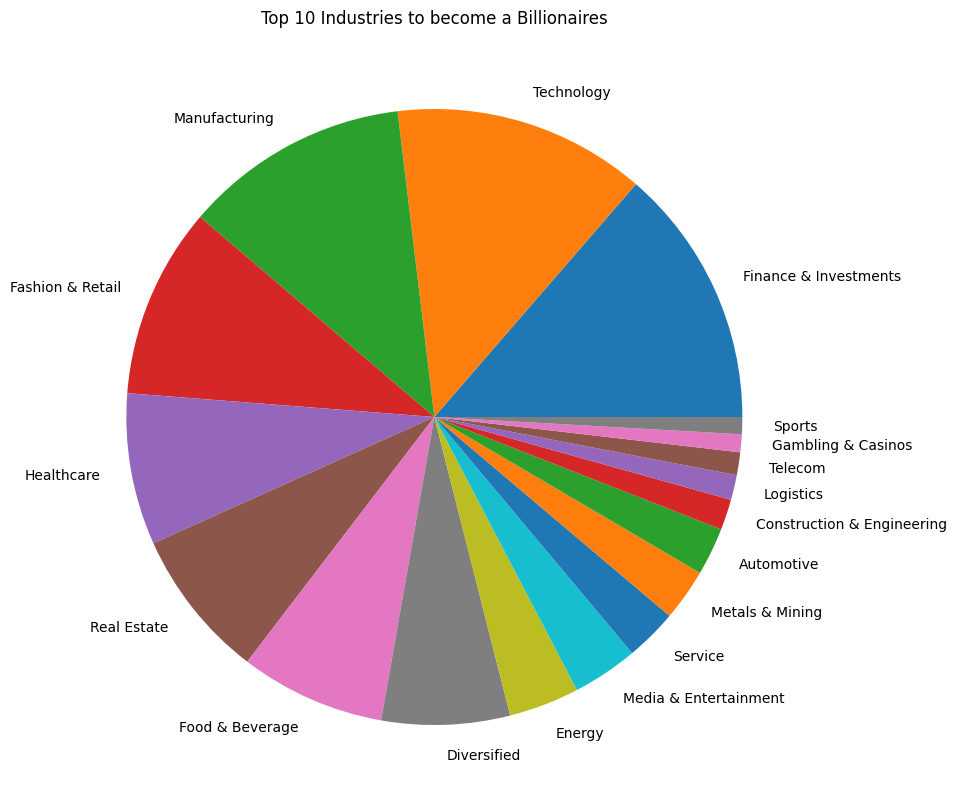

In [58]:
plt.figure(figsize=(24, 10))
plt.pie(df['count'], labels=df['Industry'])
plt.title('Top 10 Industries to become a Billionaires')
plt.show()

In [59]:
df = data['Country'].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


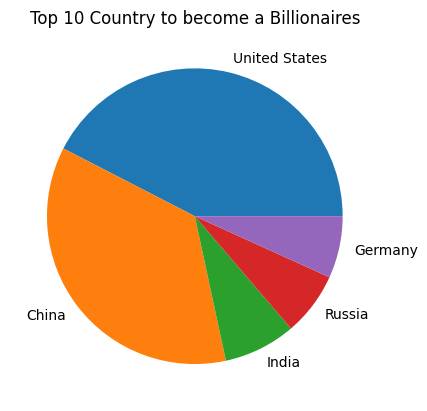

In [60]:
plt.pie(df['count'], labels=df['Country'])
plt.title('Top 5 Country to become a Billionaires')
plt.show()

A. میانگین و واریانس سن ثروتمند ترین افراد جهان را بدست آورید


In [64]:
mean = data['Age'].mean()
variance = data['Age'].var()
print('Mean : ', mean, ' &  Variance : ', variance)


Mean :  63.1136023916293  &  Variance :  180.7721364011008


B. مجموع ثروت هر کشور را بدست آورید و روی نمودار نمایش دهید


In [73]:
net_worth = data.groupby(['Country'])['NetWorth'].sum().reset_index()
net_worth = net_worth.sort_values(by=['Country'], ascending=True)
net_worth

,Country,NetWorth
0,Algeria,4.8
1,Argentina,9.2
2,Australia,176.7
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,196.5
66,United States,4384.7
67,Venezuela,3.2
68,Vietnam,16.7


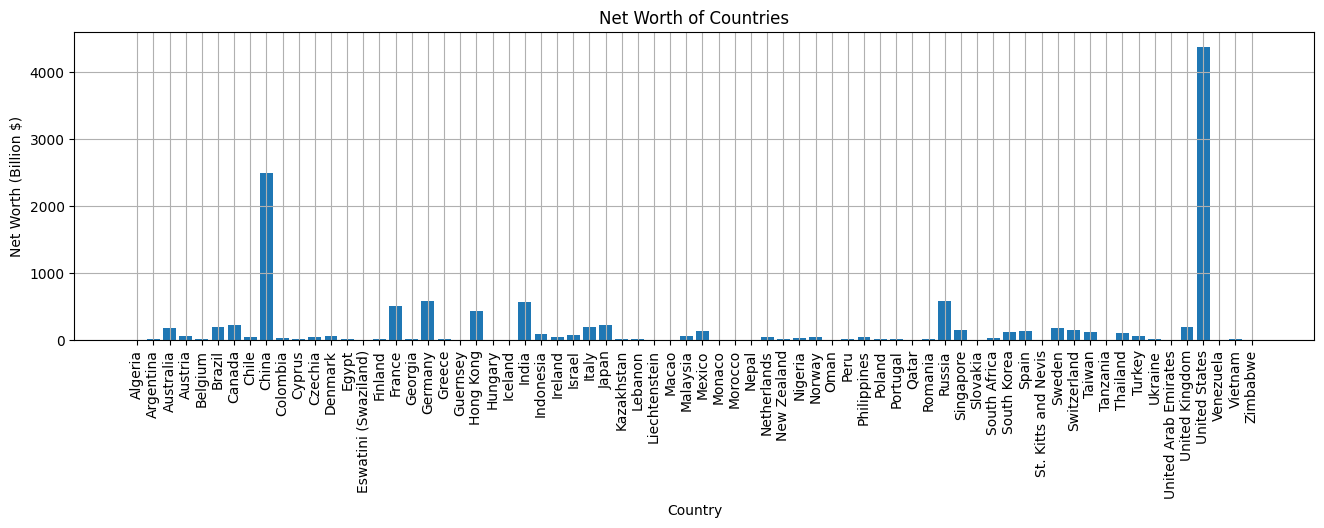

In [84]:
plt.figure(figsize=(16, 4))
plt.bar(net_worth['Country'], net_worth['NetWorth'])
plt.title('Net Worth of Countries')
plt.xlabel('Country')
plt.ylabel('Net Worth (Billion $)')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

C. ده فرد اول ثروتمند آمریکایی را به همراه ثروت آن ها بر روی نمودار نمایش دهید


In [83]:
df_us = data.query("Country=='United States'").reset_index(drop=True)

american_reachs = df_us.groupby(['Name'])['NetWorth'].sum().reset_index()

american_reachs = american_reachs.sort_values(by=['NetWorth'], ascending=False).head(10).reset_index(drop=True)

american_reachs

,Name,NetWorth
0,Jeff Bezos,177.0
1,Elon Musk,151.0
2,Bill Gates,124.0
3,Mark Zuckerberg,97.0
4,Warren Buffett,96.0
5,Larry Ellison,93.0
6,Larry Page,91.5
7,Sergey Brin,89.0
8,Steve Ballmer,68.7
9,Alice Walton,61.8


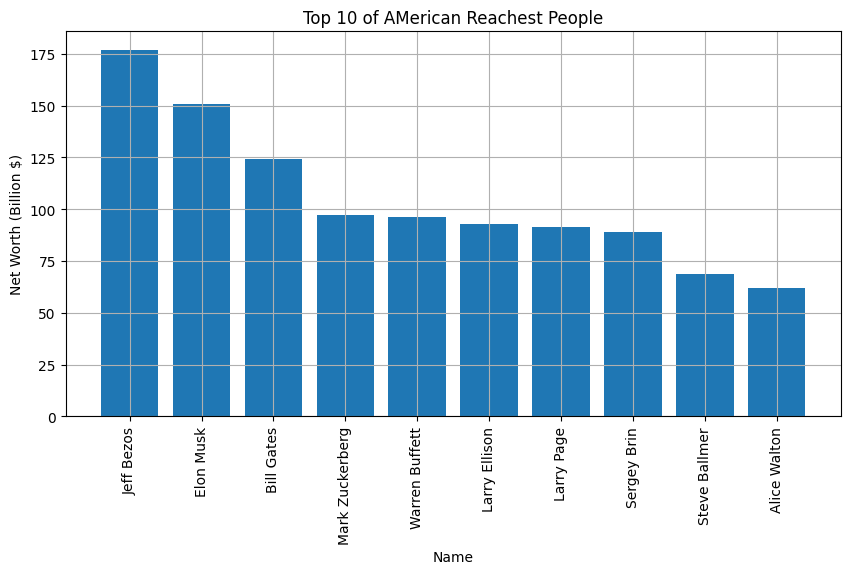

In [92]:
plt.figure(figsize=(10, 5))
plt.bar(american_reachs['Name'], american_reachs['NetWorth'])
plt.title('Top 10 of AMerican Reachest People')
plt.xlabel('Name')
plt.ylabel('Net Worth (Billion $)')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

D. ده کشوری که کمترین تعداد ثروتمند در جهان دارند را به همراه تعداد ثروتمندان آن ها بر روی نمودار نمایش دهید. چرا نام کشور ما در این لیست دیده نمی شود؟

In [98]:
df = data['Country'].value_counts().reset_index()
df = df.sort_values(by=['count']).head(10).reset_index(drop=True)
df

,Country,count
0,Nepal,1
1,Zimbabwe,1
2,St. Kitts and Nevis,1
3,Tanzania,1
4,Guernsey,1
5,Oman,1
6,Liechtenstein,1
7,Macao,1
8,Venezuela,1
9,Eswatini (Swaziland),1


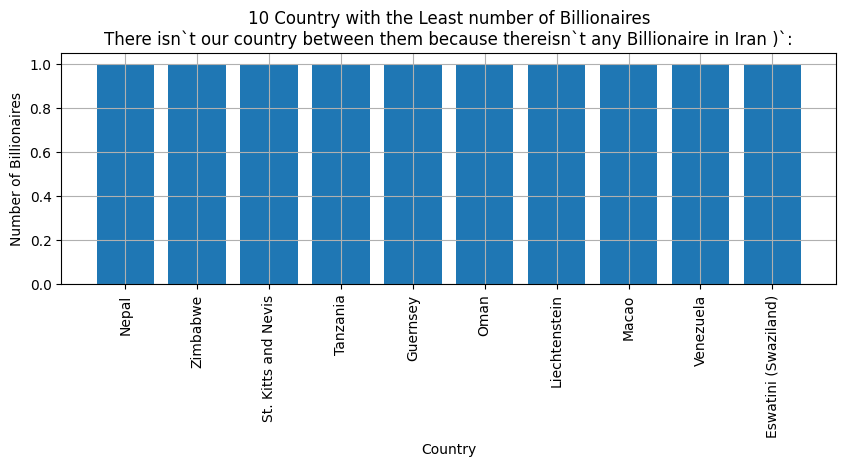

In [110]:
plt.figure(figsize=(10, 3))
plt.bar(df['Country'], df['count'])
plt.title('10 Country with the Least number of Billionaires\nThere isn`t our country between them because thereisn`t any Billionaire in Iran )`:')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()